# pylimons: Python Linac MOdeling aNd Simulation

In [1353]:
import numpy as np

## Utils

In [1354]:
import utils

In [1355]:
utils.h

6.62607015e-34

In [1356]:
from utils import physical_constants as pconstants

In [1357]:
pconstants.c

299792458.0

In [1358]:
pconstants.m_e

0.51099895

## Beam

### Particle Class

In [1359]:
from beam import Particle

In [1360]:
particle = Particle('electron', 10)

In [1361]:
particle.get_gamma()

20.569511835591836

In [1362]:
particle.get_momentum()

9.98693546955716

In [1363]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [1364]:
particle.update_energy(20)

In [1365]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 20 MeV
particle momentum : 19.99347093611059 MeV/c
particle gamma    : 40.13902367118367
particle beta     : 0.9996896128022548


### Bunch Class

In [1366]:
from beam import Bunch

In [1367]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10-6]

#Bunch(sepcies, energy, dimension, num_particles, twiss_x, twiss_y)

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [1368]:
particles = bunch.generate_transverse_matched_beam_distribution()
print (particles.shape)

(4, 10000)


In [1369]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [1370]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 4 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [1371]:
x = particles[0,:]
xp = particles[1,:]

In [1372]:
from matplotlib import pyplot as plt

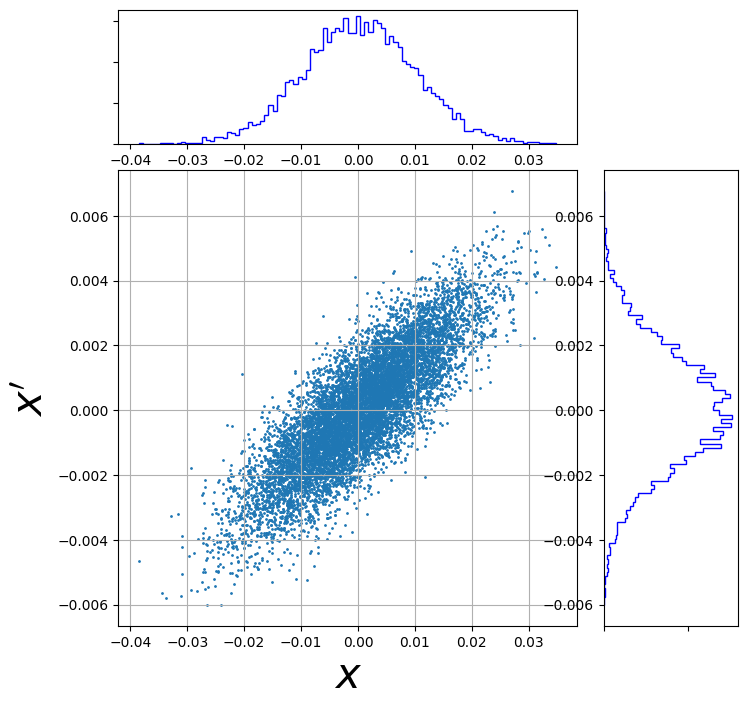

In [1373]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

## Elements

### Element Class (Parent Class)

In [1374]:
from elements import Element

In [1375]:
quad = Element("qf", "quadrupole", 0.2, 20)

In [1376]:
quad.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.2
element strength : 20
element aperture : Not defined


In [1377]:
quad2 = quad.element_copy("quad2")

In [1378]:
quad2.set_element_property(length=0.4)

In [1379]:
quad2.get_element_property("length")

The element's length is 0.4


In [1380]:
quad2.print_element_properties()

element name     : quad2
element type     : quadrupole
element length   : 0.4
element strength : 20
element aperture : Not defined


### Drift Class (Child Class)

In [1381]:
from elements import Drift

In [1382]:
d1 = Drift("d1", "drift", 10)

In [1383]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [1384]:
d1.set_element_property(length=20)
d1.get_element_property("length")

The element's length is 20


In [1385]:
matd1 = d1.get_transfer_matrix()
print (matd1)

[[ 1. 20.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. 20.]
 [ 0.  0.  0.  1.]]


In [1386]:
d1.propagate(bunch)
new_particles = bunch.state

In [1387]:
print (matd1.shape, particles.shape)

(4, 4) (4, 10000)


In [1388]:
new_particles.shape

(4, 10000)

In [1389]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

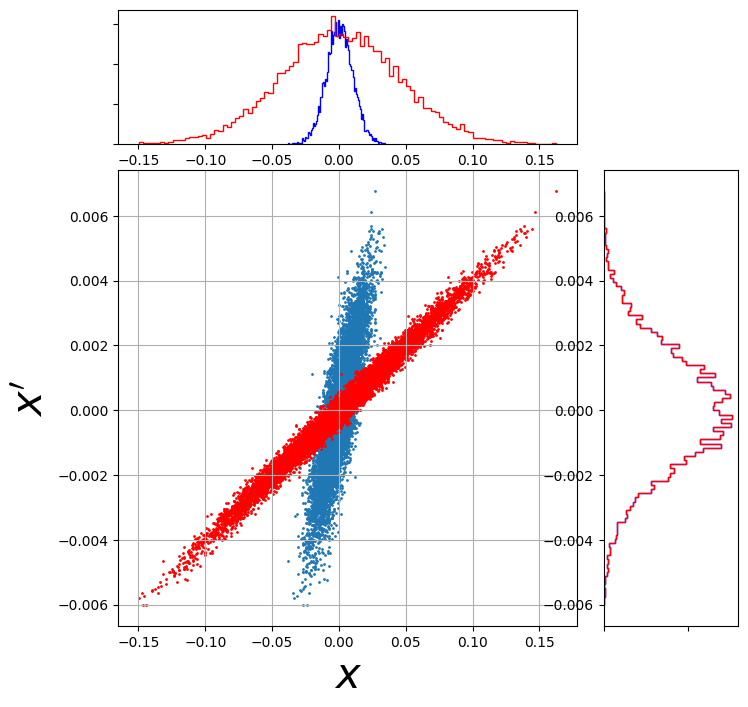

In [1390]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### SBend Class

In [1391]:
from elements import Sbend

In [1392]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [1393]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [1394]:
b1.get_element_property("length")
b1.get_element_property("strength")
b1.get_element_property("angle")
b1.get_element_property("phi")

The element's length is 1.5
The element's strength is 22.5
The element's angle is 22.5
The element's phi is 0.39269908169872414


In [1395]:
matb1 = b1.get_transfer_matrix()
print (matb1)

[[ 0.92387953  1.46174304  0.          0.        ]
 [-0.10018629  0.92387953  0.          0.        ]
 [ 0.          0.          1.          1.5       ]
 [ 0.          0.          0.          1.        ]]


In [1396]:
np.linalg.det(matb1[0:2,0:2])

1.0

In [1397]:
from beam import Bunch
from matplotlib import pyplot as plt

In [1398]:
twiss_x = [-1.5, 10, 10-6]
twiss_y = [1.5, 10, 10-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [1399]:
x = particles[0,:]
xp = particles[1,:]

In [1400]:
b1.propagate(bunch)
new_particles = bunch.state

In [1401]:
print (matb1.shape, particles.shape)

(4, 4) (4, 10000)


In [1402]:
new_particles.shape

(4, 10000)

In [1403]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

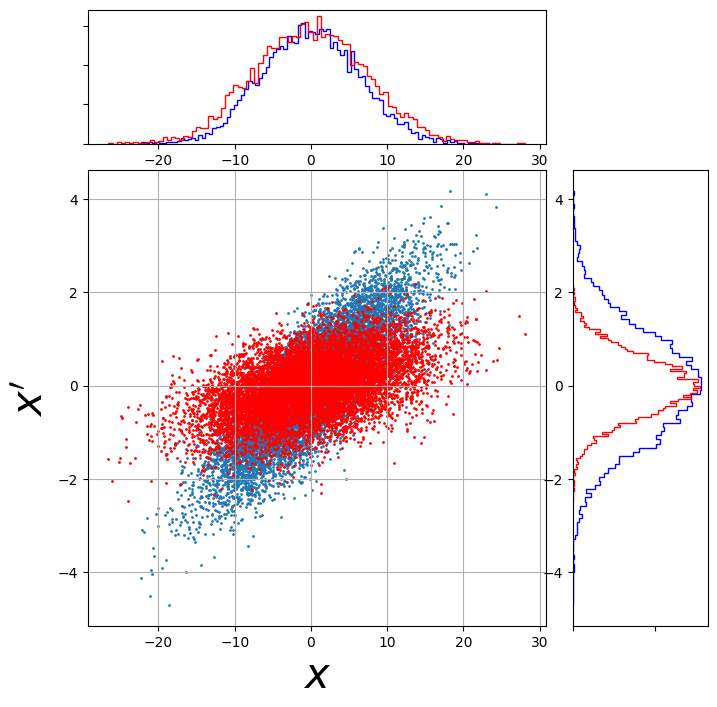

In [1404]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [1405]:
y = particles[2,:]
yp = particles[3,:]

In [1406]:
ny = new_particles[2,:]
nyp = new_particles[3,:]

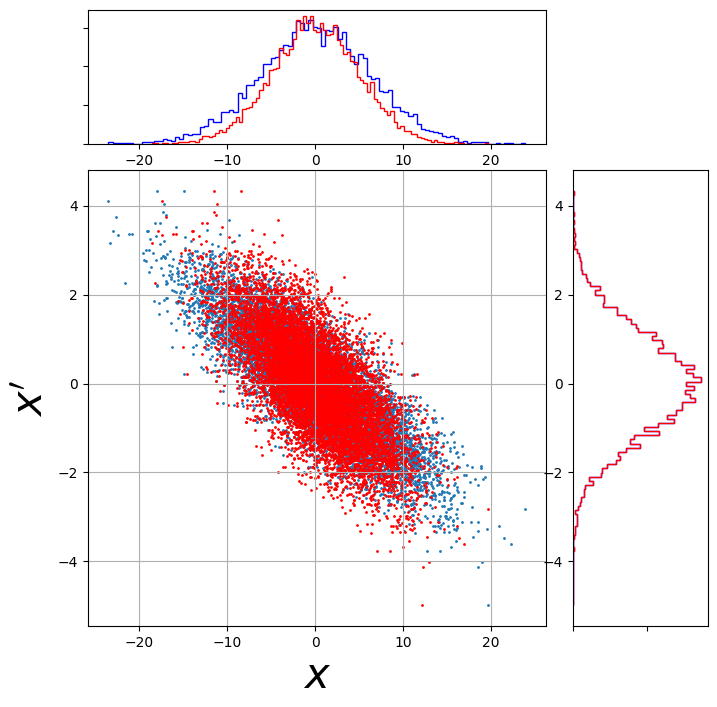

In [1407]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(y, yp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(ny, nyp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(y, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(yp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(ny, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nyp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

###  Quadrupole Class

In [1408]:
from elements import Quadrupole

In [1409]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [1410]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [1411]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [1412]:
qf.get_element_property("length")
qf.get_element_property("strength")
qf.get_element_property("k1")

The element's length is 0.4
The element's strength is 1.2
The element's k1 is 1.2


In [1413]:
qd.get_element_property("length")
qd.get_element_property("strength")
qd.get_element_property("k1")

The element's length is 0.4
The element's strength is -1.2
The element's k1 is -1.2


In [1414]:
matqf = qf.get_transfer_matrix()
print (matqf)

[[ 0.9055262   0.38732232  0.          0.        ]
 [-0.46478678  0.9055262   0.          0.        ]
 [ 0.          0.          1.09754586  0.41292344]
 [ 0.          0.          0.49550813  1.09754586]]


In [1415]:
matqd = qd.get_transfer_matrix()
print (matqd)

[[ 1.09754586  0.41292344  0.          0.        ]
 [ 0.49550813  1.09754586  0.          0.        ]
 [ 0.          0.          0.9055262   0.38732232]
 [ 0.          0.         -0.46478678  0.9055262 ]]


In [1416]:
print (np.linalg.det(matqf[0:2, 0:2]), np.linalg.det(matqf[2:4, 2:4]), np.linalg.det(matqd[0:2, 0:2]), np.linalg.det(matqd[2:4, 2:4]))

1.0000000000000002 1.0000000000000002 1.0000000000000002 1.0000000000000002


In [1417]:
twiss_x = [-1.5, 10, 10-6]
twiss_y = [1.5, 10, 10-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [1418]:
x = particles[0,:]
xp = particles[1,:]

In [1419]:
qf.propagate(bunch)
new_particles = bunch.state

In [1420]:
print (matqf.shape, particles.shape)

(4, 4) (4, 10000)


In [1421]:
new_particles.shape

(4, 10000)

In [1422]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

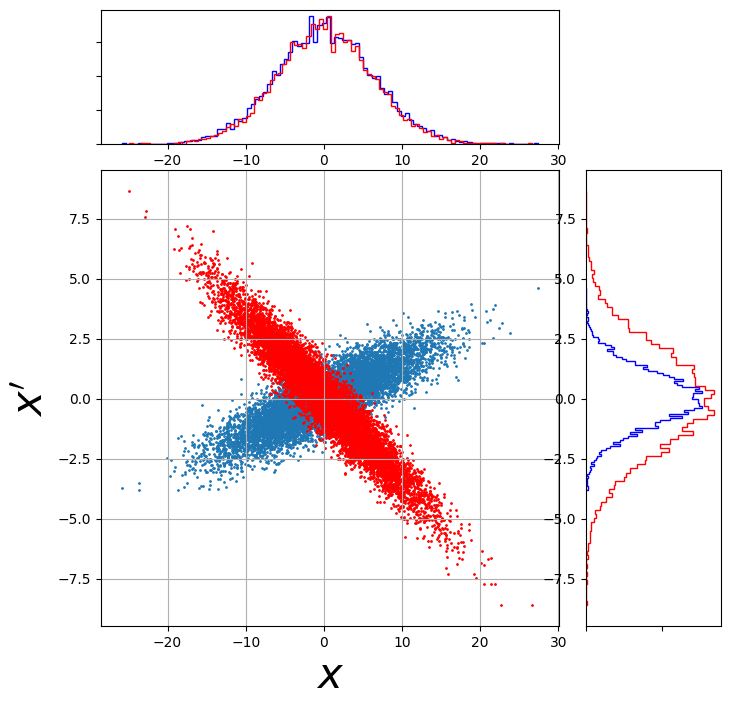

In [1423]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [1424]:
twiss_x = [-1.5, 10, 10-6]
twiss_y = [1.5, 10, 10-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [1425]:
x = particles[0,:]
xp = particles[1,:]

In [1426]:
qd.propagate(bunch)
new_particles = bunch.state

In [1427]:
print (matqd.shape, particles.shape)

(4, 4) (4, 10000)


In [1428]:
new_particles.shape

(4, 10000)

In [1429]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

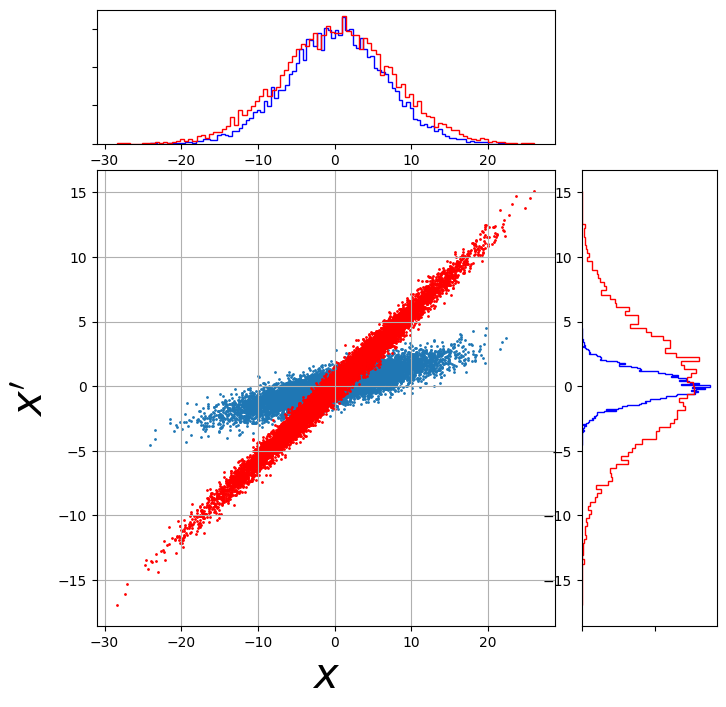

In [1430]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Solenoid Class

In [1431]:
from elements import Solenoid

In [1432]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [1433]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [1434]:
s1.get_element_property("length")
s1.get_element_property("strength")
s1.get_element_property("ks")

The element's length is 2.0
The element's strength is 0.7
The element's ks is 0.7


In [1435]:
mats1 = s1.get_transfer_matrix()
print (mats1)

[[ 0.02888883  0.23927725  0.16749408  0.16031009]
 [-0.11724585  0.02888883 -0.07855194  0.16749408]
 [-0.16749408 -0.4785545   0.02888883  0.23927725]
 [ 0.07855194 -0.16749408 -0.11724585  0.02888883]]


In [1436]:
print(np.linalg.det(mats1[0:2, 0:2]), np.linalg.det(mats1[2:4, 2:4]))

0.028888829665670947 0.028888829665670947


In [1437]:
twiss_x = [-1.5, 10, 10-6]
twiss_y = [1.5, 10, 10-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [1438]:
x = particles[0,:]
y = particles[2,:]

In [1439]:
s1.propagate(bunch)
new_particles = bunch.state

In [1440]:
print (mats1.shape, particles.shape)

(4, 4) (4, 10000)


In [1441]:
new_particles.shape

(4, 10000)

In [1442]:
nx = new_particles[0,:]
ny = new_particles[2,:]

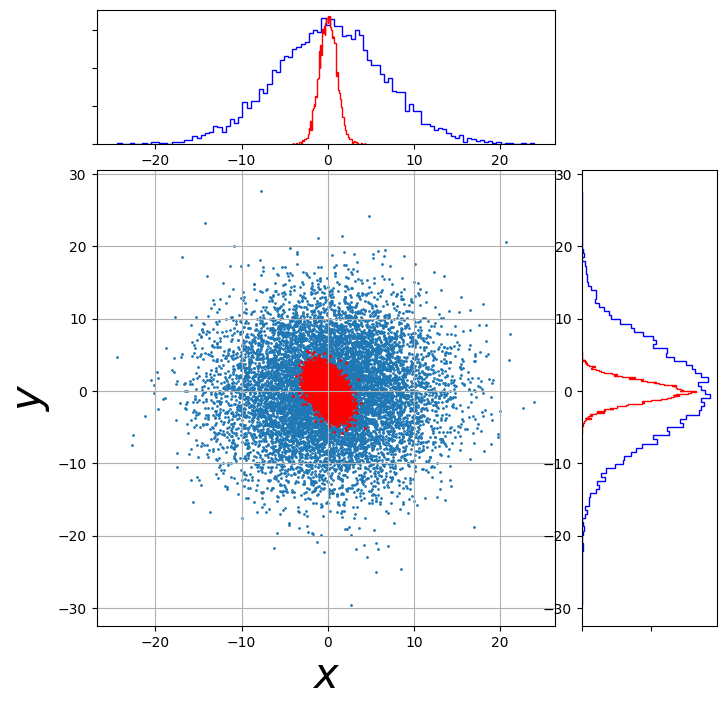

In [1443]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Marker class

In [1444]:
from elements import Marker

In [1445]:
m1 = Marker("m1", "marker")

In [1446]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [1447]:
twiss_x = [-1.5, 10, 10-6]
twiss_y = [1.5, 10, 10-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [1448]:
x = particles[0,:]
y = particles[2,:]

In [1449]:
m1.propagate(bunch)
new_particles = bunch.state

In [1450]:
new_particles.shape

(4, 10000)

In [1451]:
nx = new_particles[0,:]
ny = new_particles[2,:]

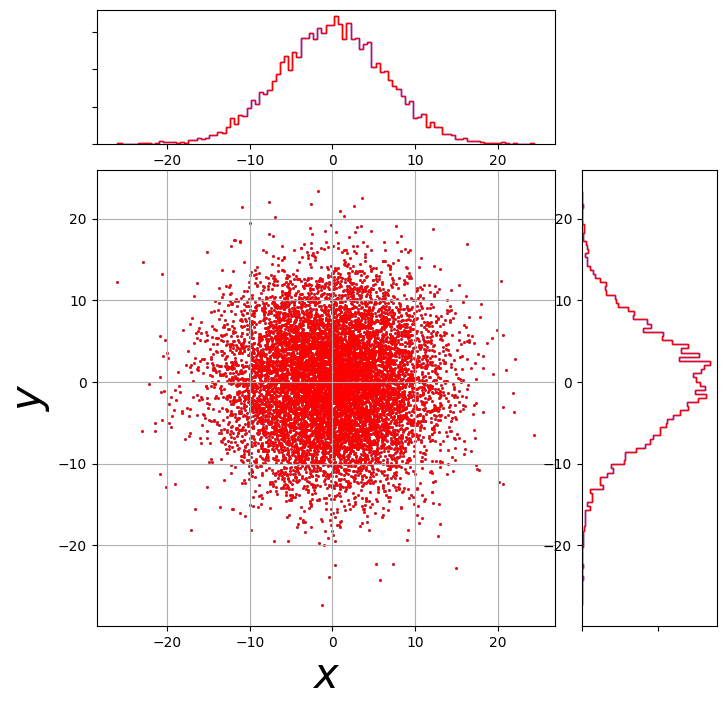

In [1452]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Aperture

### Rectangular Aperture

In [1453]:
from elements.aperture import Rectangular_aperture as ra

In [1454]:
ra1 = ra(["rectangular", 10, 20])

In [1455]:
new_particles, lost = ra1.apply_rectangular_aperture(particles)

In [1456]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 5032) 4968


In [1457]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

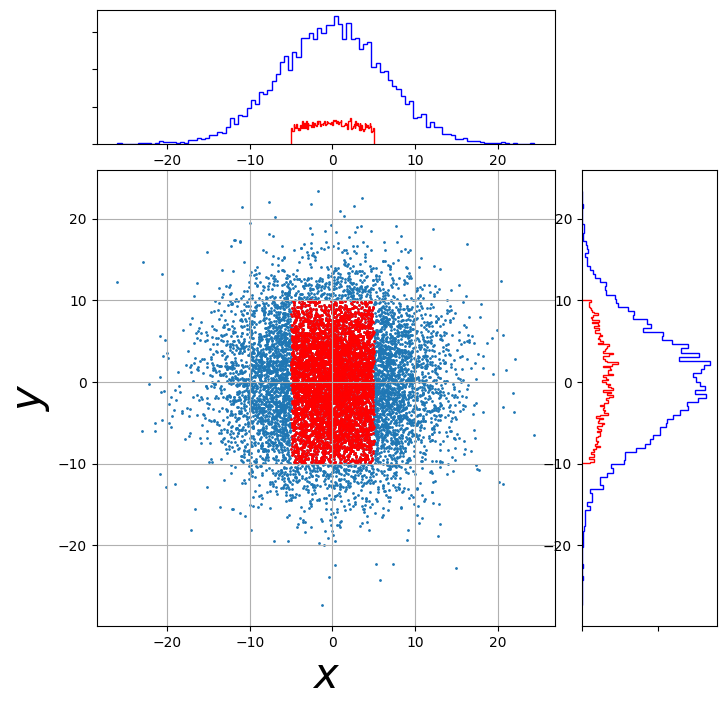

In [1458]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Circular Aperture

In [1459]:
from elements.aperture import Circular_aperture as ca

In [1460]:
ca1 = ca(["circular", 10])

In [1461]:
new_particles, lost = ca1.apply_circular_aperture(particles)

In [1462]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 7119) 2881


In [1463]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

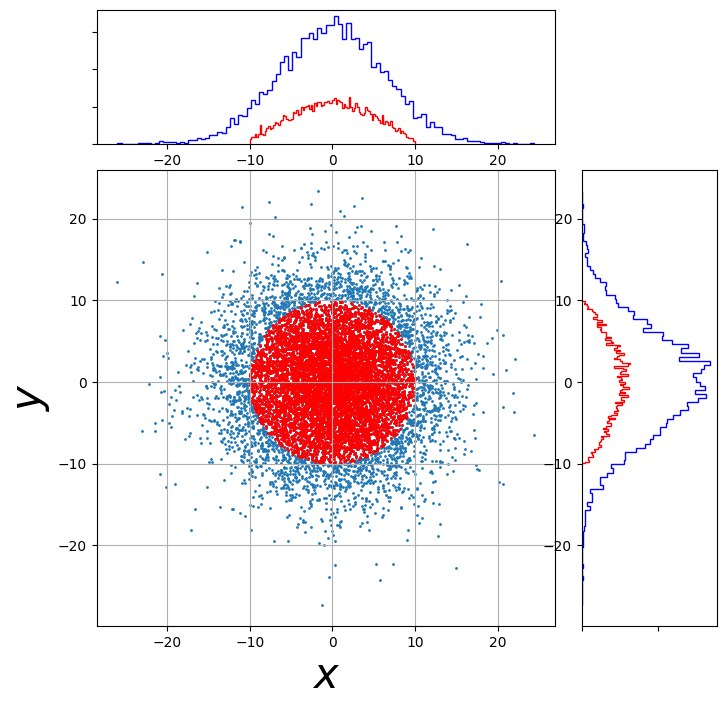

In [1464]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Elliptical Aperture

In [1465]:
from elements.aperture import Elliptical_aperture as ea

In [1466]:
ea1 = ea(["elliptical", 10, 5])

In [1467]:
new_particles, lost = ea1.apply_elliptical_aperture(particles)

In [1468]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 4394) 5606


In [1469]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

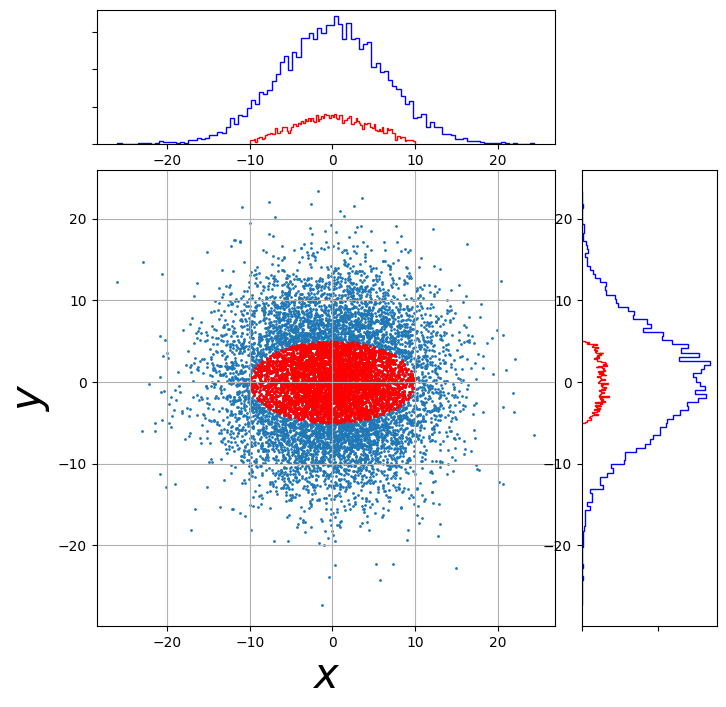

In [1470]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Apertures @ Elements

### Test Marker Element

In [1471]:
from matplotlib import pyplot as plt

In [1472]:
from elements import Marker

In [1473]:
m2 = Marker("m3", "marker")

In [1474]:
m2.print_element_properties()

element name     : m3
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [1475]:
m2.get_aperture_properties()

0

In [1476]:
m2.set_aperture_properties(["rectangular", 1e-2, 2e-2])

In [1477]:
m2.get_aperture_properties()

['rectangular', 0.01, 0.02]

In [1478]:
m2.print_element_properties()

element name     : m3
element type     : marker
element length   : 0
element strength : 0
element aperture : ['rectangular', 0.01, 0.02]


In [1479]:
m3 = Marker("m2", "marker", aperture=["circular", 1e-2])

In [1480]:
m3.print_element_properties()

element name     : m2
element type     : marker
element length   : 0
element strength : 0
element aperture : ['circular', 0.01]


In [1481]:
m3.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


In [1482]:
m3.get_aperture_properties()

['circular', 0.01]

In [1483]:
from beam import Bunch

In [1484]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [1485]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [1486]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [1487]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [1488]:
m3.propagate(bunch)

In [1489]:
bunch.print_bunch_properties()

number of macro particles : 3972
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [1490]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

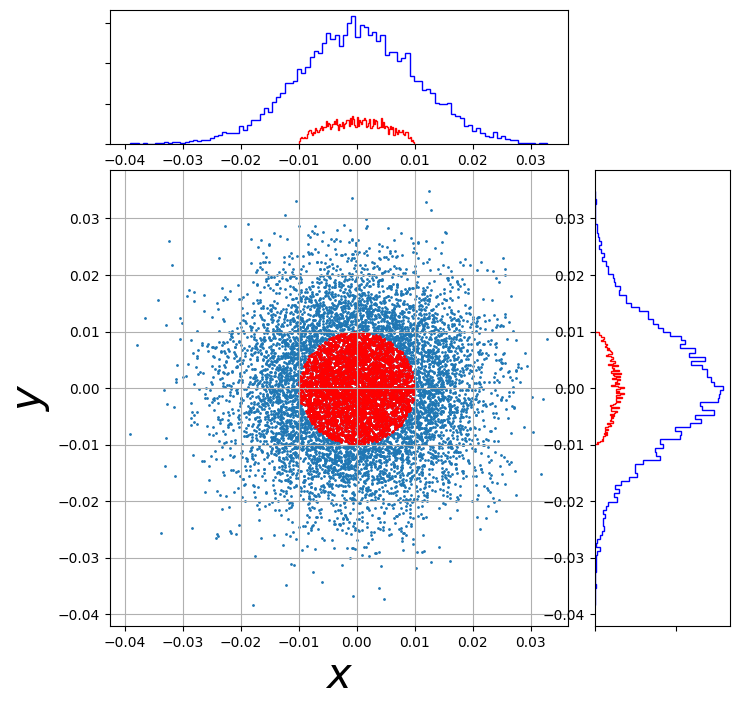

In [1491]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Drift Element

In [1492]:
from elements import Drift

In [1493]:
d1 = Drift("d1", "drift", 10)

In [1494]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [1495]:
d1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [1496]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : ['rectangular', 0.01, 0.03]


In [1497]:
d1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


In [1498]:
d1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [1499]:
from beam import Bunch

In [1500]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [1501]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [1502]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [1503]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [1504]:
d1.propagate(bunch)

In [1505]:
bunch.print_bunch_properties()

number of macro particles : 1237
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10


In [1506]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

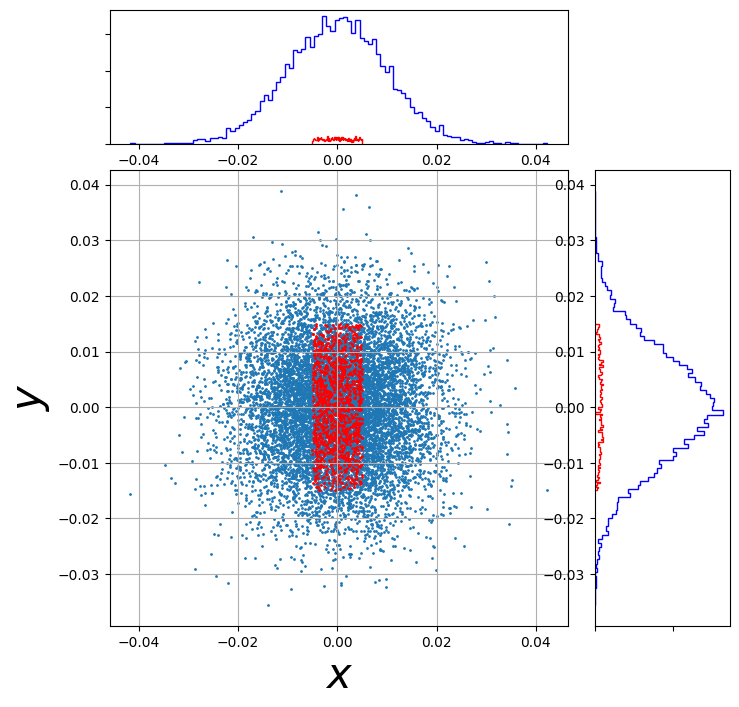

In [1507]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [1508]:
from elements import Sbend

In [1509]:
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=["circular", 1e-2])

In [1510]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [1511]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [1512]:
b1.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


In [1513]:
b1.get_aperture_properties()

['circular', 0.01]

In [1514]:
from beam import Bunch

In [1515]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [1516]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [1517]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [1518]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [1519]:
b1.propagate(bunch)

In [1520]:
bunch.print_bunch_properties()

number of macro particles : 4136
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 1.5


In [1521]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

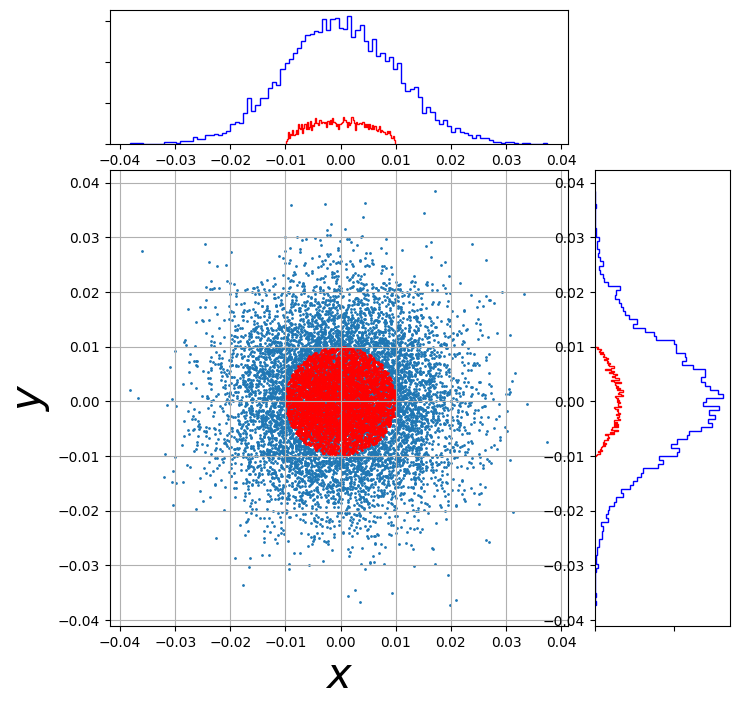

In [1522]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quad Element

In [1523]:
from elements import Quadrupole

In [1524]:
qf1 = Quadrupole("qf", "quadrupole", 0.4, 1.2)

In [1525]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [1526]:
qf1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [1527]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : ['rectangular', 0.01, 0.03]


In [1528]:
qf1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


In [1529]:
qf1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [1530]:
from beam import Bunch

In [1531]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [1533]:
particles = bunch.generate_transverse_matched_beam_distribution(5)

TypeError: generate_transverse_matched_beam_distribution() takes 1 positional argument but 2 were given

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [ ]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [ ]:
qf1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 3438
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0.4


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

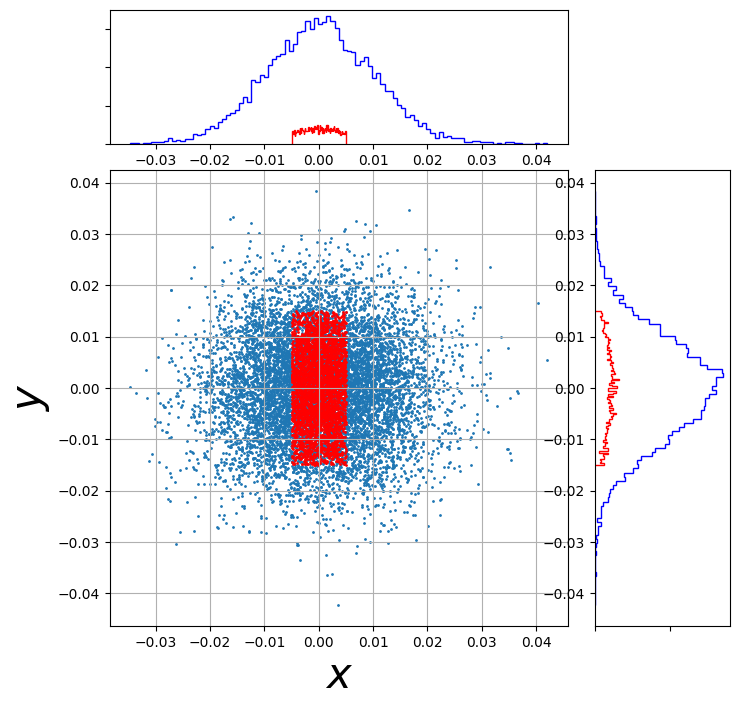

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Solenoid Element

In [ ]:
from elements import Solenoid

In [ ]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [ ]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [ ]:
s1.set_aperture_properties(["elliptical", 5e-3, 7e-3])

In [ ]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : ['elliptical', 0.005, 0.007]


In [ ]:
s1.get_element_property("aperture")

The element's aperture is ['elliptical', 0.005, 0.007]


In [ ]:
s1.get_aperture_properties()

['elliptical', 0.005, 0.007]

In [ ]:
from beam import Bunch

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution(5)

TypeError: generate_transverse_matched_beam_distribution() takes 1 positional argument but 2 were given

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [ ]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [ ]:
s1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 9820
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 2.0


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

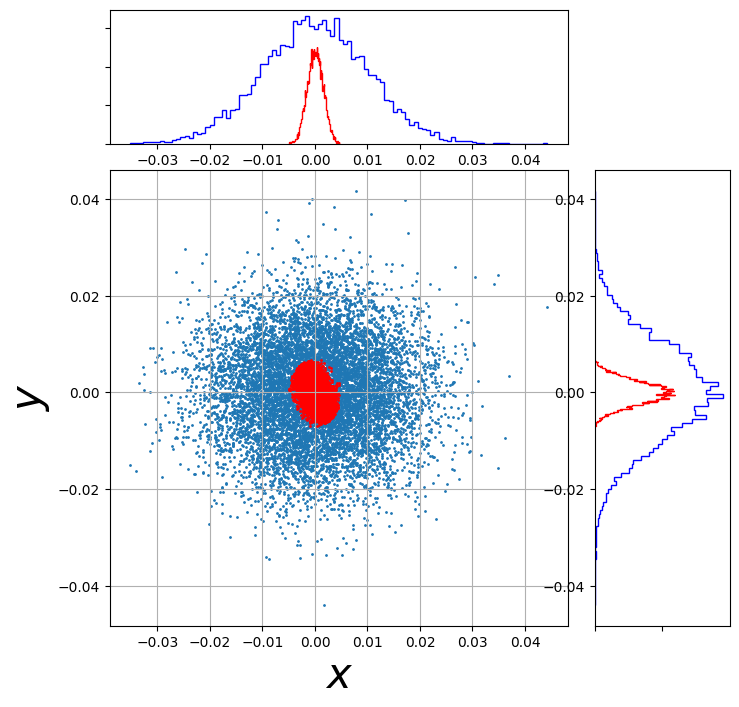

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Reference Particle

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from beam import Bunch

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [ ]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [ ]:
particles = bunch.state

In [ ]:
bunch.particle.update_s(10)
print (bunch.particle.get_s())

10


In [ ]:
bunch.state

array([[ 0.01554678, -0.00151858, -0.00158281, ..., -0.00519387,
        -0.00675454, -0.0033968 ],
       [ 0.00124475,  0.00029065,  0.00150652, ..., -0.00052226,
        -0.00245436, -0.00024129],
       [ 0.00449472, -0.01463679, -0.00619666, ...,  0.01866834,
        -0.02609049, -0.00184795],
       [-0.00053795,  0.00148825,  0.00168855, ..., -0.00251282,
         0.0039268 ,  0.00023526]])

In [ ]:
particles

array([[ 0.01554678, -0.00151858, -0.00158281, ..., -0.00519387,
        -0.00675454, -0.0033968 ],
       [ 0.00124475,  0.00029065,  0.00150652, ..., -0.00052226,
        -0.00245436, -0.00024129],
       [ 0.00449472, -0.01463679, -0.00619666, ...,  0.01866834,
        -0.02609049, -0.00184795],
       [-0.00053795,  0.00148825,  0.00168855, ..., -0.00251282,
         0.0039268 ,  0.00023526]])

In [ ]:
refparticle = bunch.particle

In [ ]:
refparticle.get_s()

10

In [ ]:
refparticle.update_s(2)

In [ ]:
refparticle.get_s()

12

In [ ]:
bunch.particle.get_s()

12

In [ ]:
bunch.particle.reset_s()

### Test Drift Element

In [ ]:
from elements import Drift

In [ ]:
d1 = Drift("d1", "drift", 5)

In [ ]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 5
element strength : 0
element aperture : Not defined


In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [ ]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [ ]:
d1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

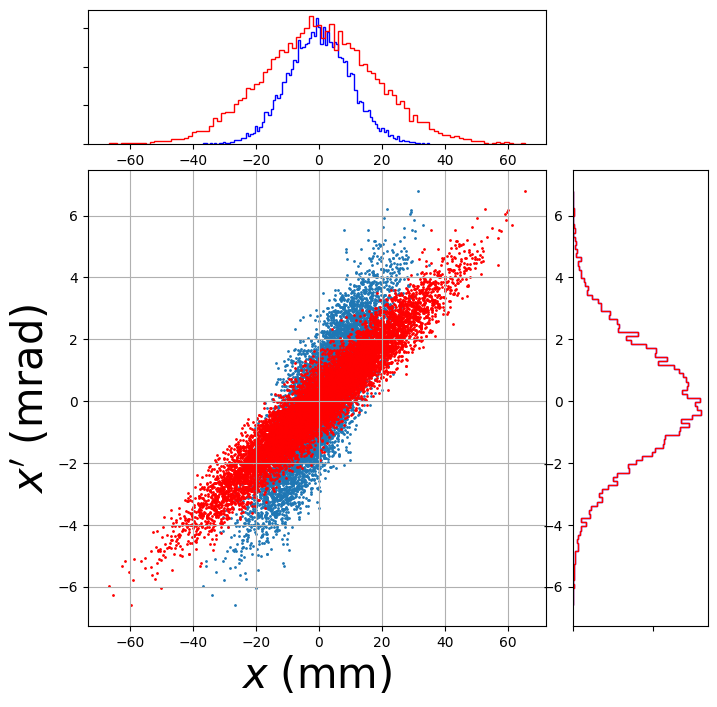

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [ ]:
from elements import Sbend

In [ ]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [ ]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [ ]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [ ]:
b1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.5


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

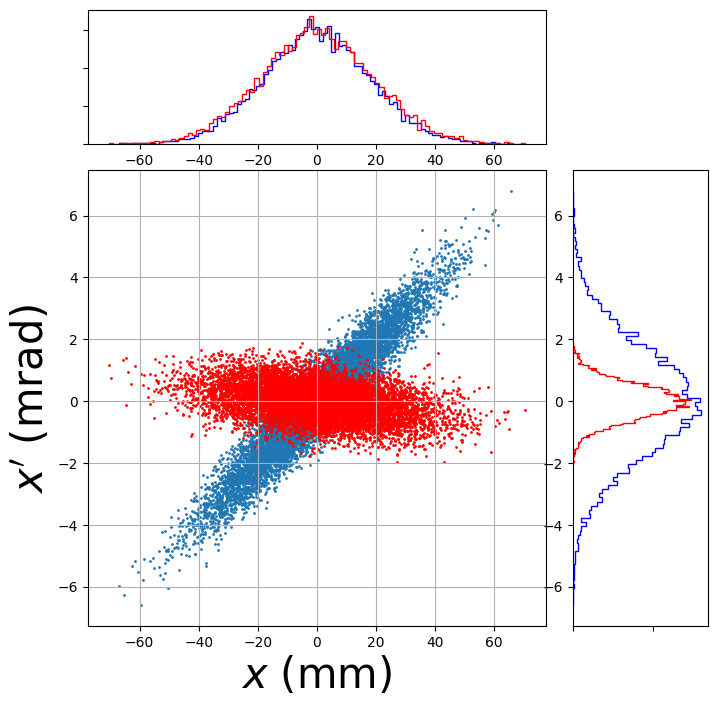

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quadrupole Element

In [ ]:
from elements import Quadrupole

In [ ]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [ ]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [ ]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [ ]:
bunch.print_bunch_properties()

number of macro particles : 7
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 47.60000000000001


In [ ]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [ ]:
d1.propagate(bunch)
qf.propagate(bunch)
d1.propagate(bunch)
qd.propagate(bunch)
d1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 1
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 63.400000000000006


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

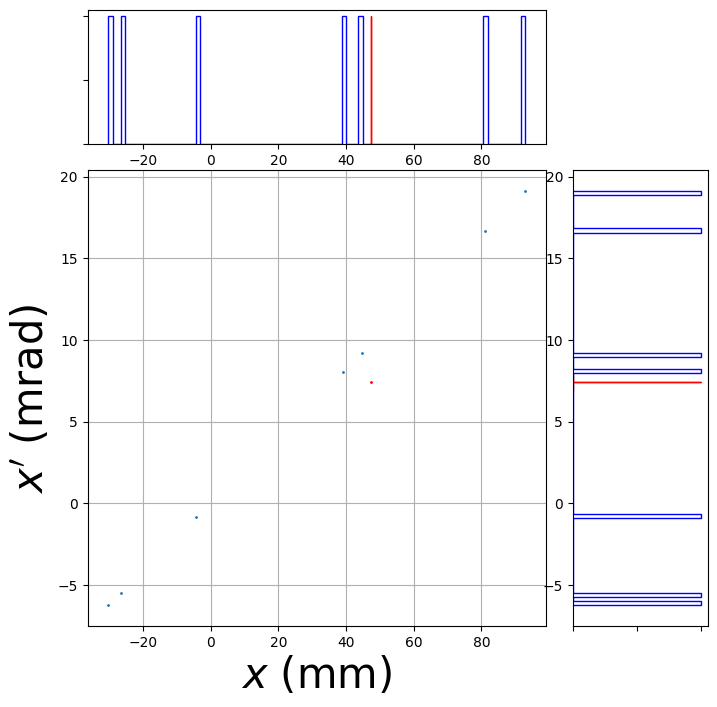

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Marker

In [ ]:
from elements import Marker

In [ ]:
m1 = Marker("m1", "marker")

In [ ]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [ ]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [ ]:
m1.propagate(bunch)

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

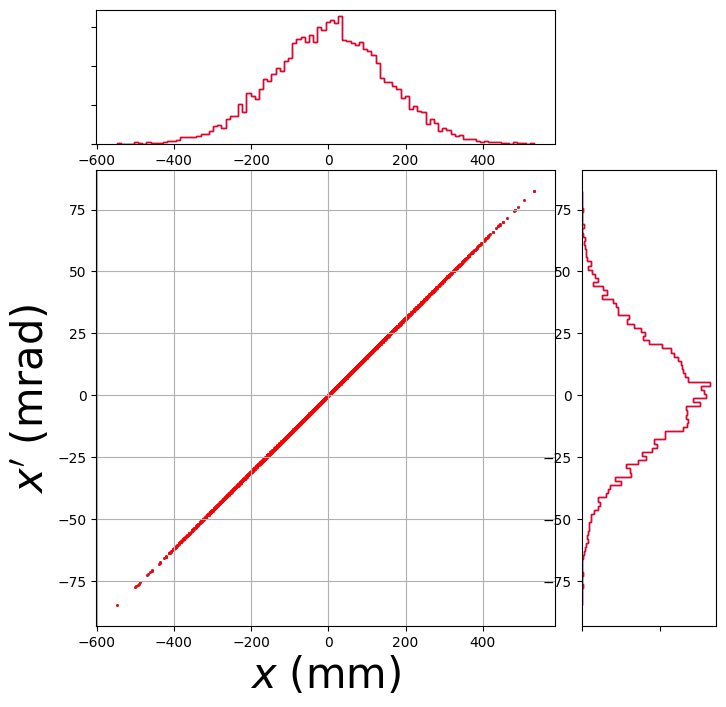

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Beamline

In [ ]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

### Construct Beamline List

In [ ]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [ ]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [ ]:
fodo_list[0].element_properties["type"]

'quadrupole'

In [ ]:
fodo = Beamline("fodo", fodo_list)

In [ ]:
fodo.get_num_beamline_elements()

9


In [ ]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [ ]:
fodo.propagate_beamline(bunch)

In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 1888
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.8


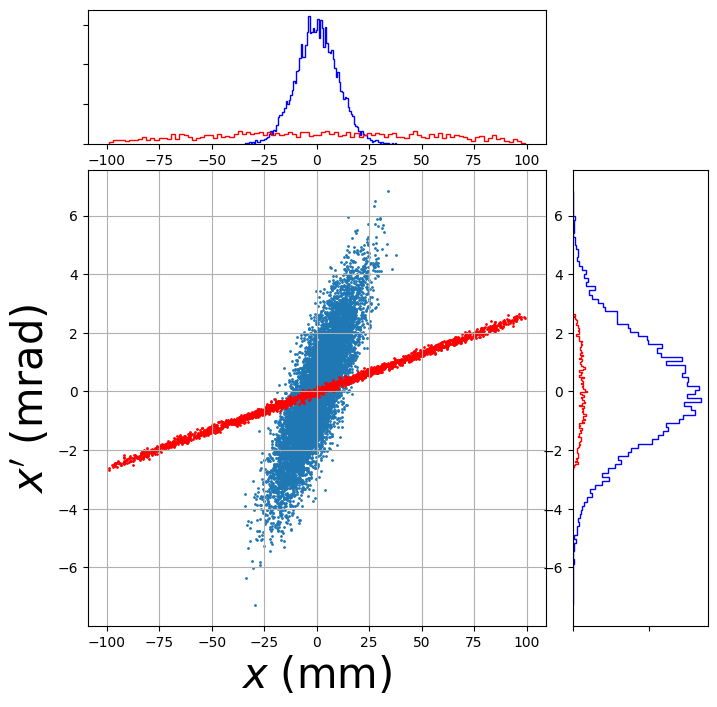

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

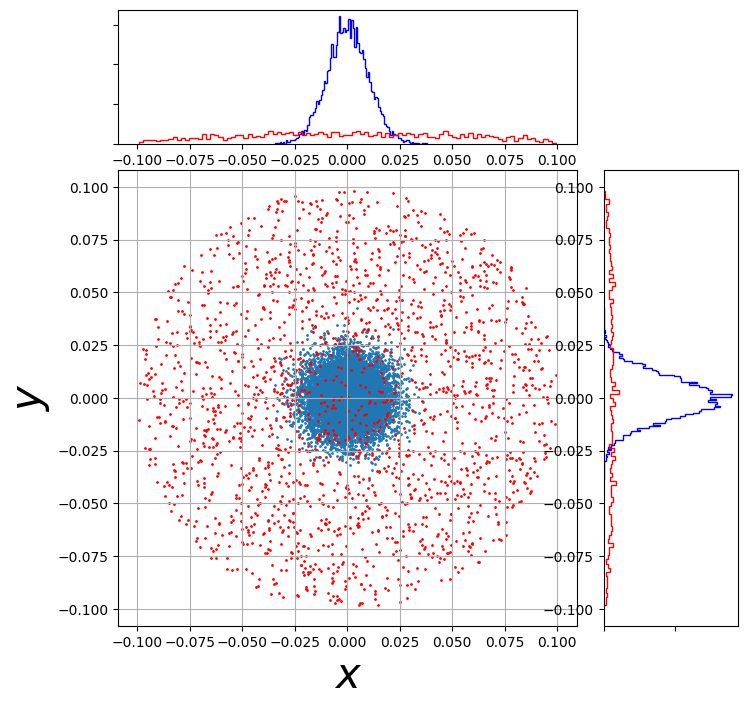

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Element and Beamline Slicing

## Element Slicing

In [ ]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

In [ ]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])

In [ ]:
new_element = d1.slice_element(2)

In [ ]:
for element in new_element:
    element.print_element_properties()

element name     : d1_0
element type     : drift
element length   : 2.5
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_1
element type     : drift
element length   : 2.5
element strength : 0
element aperture : ['circular', 0.1]


### Beamline Slicing

In [ ]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [ ]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [ ]:
fodo_list[0].element_properties["type"]

'quadrupole'

In [ ]:
fodo = Beamline("fodo", fodo_list)

In [ ]:
fodo.get_num_beamline_elements()

9


In [ ]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [ ]:
fodo.slice_beamline(4)

In [ ]:
fodo.print_sliced_beamline()

 qf_0 quadrupole  0.100  1.200  0.100
 qf_1 quadrupole  0.100  1.200  0.200
 qf_2 quadrupole  0.100  1.200  0.300
 qf_3 quadrupole  0.100  1.200  0.400
 d1_0      drift  1.250  0.000  1.650
 d1_1      drift  1.250  0.000  2.900
 d1_2      drift  1.250  0.000  4.150
 d1_3      drift  1.250  0.000  5.400
 b1_0      sbend  0.375  5.625  5.775
 b1_1      sbend  0.375  5.625  6.150
 b1_2      sbend  0.375  5.625  6.525
 b1_3      sbend  0.375  5.625  6.900
 d1_0      drift  1.250  0.000  8.150
 d1_1      drift  1.250  0.000  9.400
 d1_2      drift  1.250  0.000 10.650
 d1_3      drift  1.250  0.000 11.900
 qd_0 quadrupole  0.100 -1.200 12.000
 qd_1 quadrupole  0.100 -1.200 12.100
 qd_2 quadrupole  0.100 -1.200 12.200
 qd_3 quadrupole  0.100 -1.200 12.300
 d1_0      drift  1.250  0.000 13.550
 d1_1      drift  1.250  0.000 14.800
 d1_2      drift  1.250  0.000 16.050
 d1_3      drift  1.250  0.000 17.300
 b1_0      sbend  0.375  5.625 17.675
 b1_1      sbend  0.375  5.625 18.050
 b1_2      s

In [ ]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [ ]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 255
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.799999999999997


In [ ]:
fodo.propagate_sliced_beamline(bunch)

In [ ]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [ ]:
bunch.print_bunch_properties()

number of macro particles : 7
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 47.60000000000001


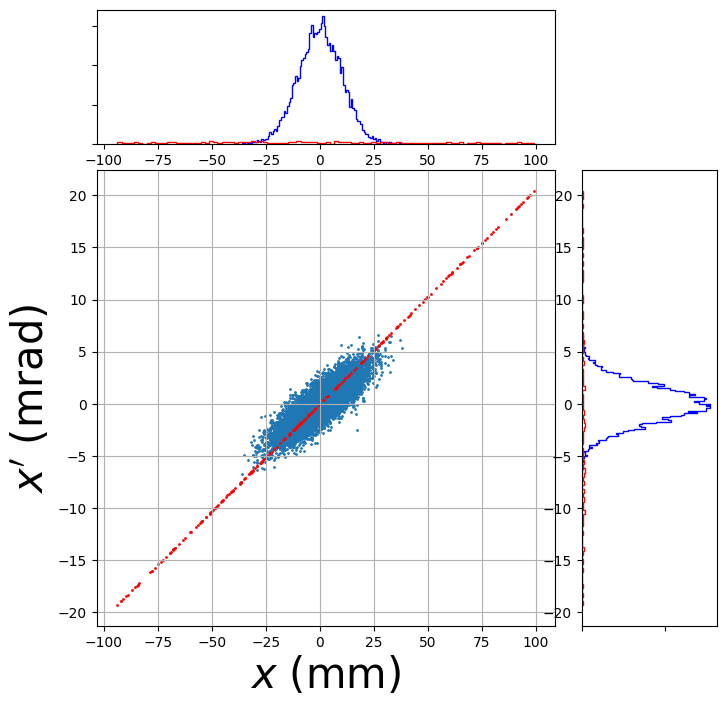

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

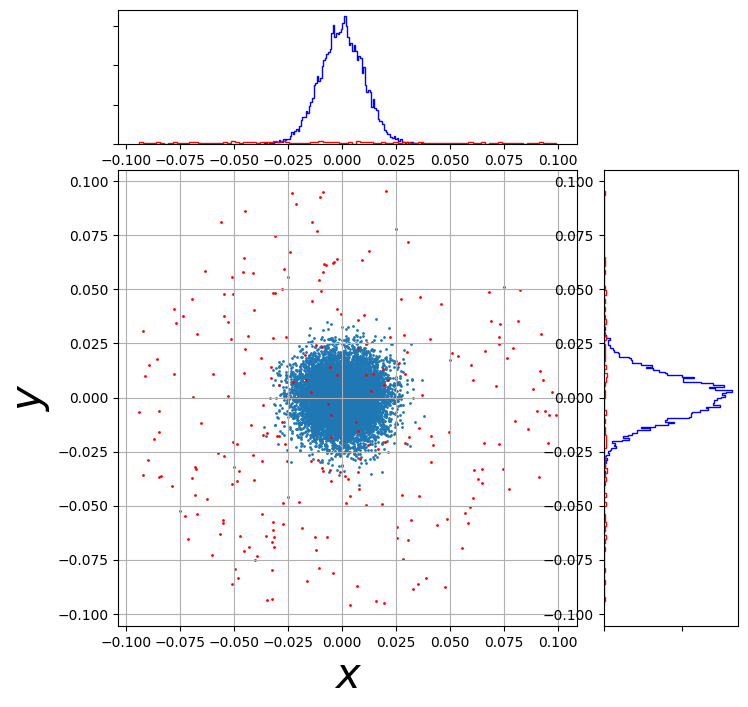

In [ ]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()